In [3]:
from ase                        import Atoms
from ase.visualize              import view
import matplotlib.pyplot            as plt
import graphdot.kernel.molecular    as gkern
import graphdot
import seaborn                      as sns
import numpy                        as np
import timeit
import pandas                       as pd
import scipy
import sklearn.linear_model
import random
import pickle

In [2]:
# import data from feti_filtered.dat
with open("feti_graphs.dat", "rb") as input_file:
    graphs = pickle.load(input_file)

In [4]:
# returns a normalized k matrix given a set of hyperparameters.
def hyper_to_k_sim(nu, lambda_h):
    zeta = 1
    s = 1
    # try higher q for shorter mean path lengths
    q = .2
    # use kernel from atomization paper
    tang_kernel = gkern.Tang2019MolecularKernel(
                        stopping_probability=q,
                        starting_probability=lambda x, y: s,
                        element_prior=nu,
                        edge_length_scale=lambda_h)
    k = tang_kernel(graphs[:50], lmin=1)
    d = np.diag(k)**-0.5
    k_sim = np.diag(d).dot(k).dot(np.diag(d))

    return k_sim

In [5]:
def k_sim_to_variance(k_sim):
    flat = k_sim.flatten()
    return np.var(flat)

def k_sim_to_mean(k_sim):
    flat = k_sim.flatten()
    return np.mean(flat)

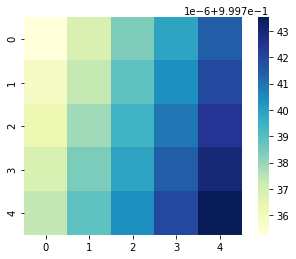

In [8]:
nu_s = [.294,.297,.300,.303,.306]
lambda_s = [.098,.099,.100,.101,.102]

k_sim_matrix = []
var_matrix = []
mean_matrix=[]
for nu in nu_s:
    k_sim_matrix.append([])
    var_matrix.append([])
    mean_matrix.append([])
    for lambda_h in lambda_s:
        k_sim = hyper_to_k_sim(nu, lambda_h)
        k_sim_matrix[-1].append(k_sim)
        flat = k_sim.flatten()
        var = np.var(flat)
        var_matrix[-1].append(var)
        mean= np.mean(flat)
        mean_matrix[-1].append(mean)
        
sns.heatmap(mean_matrix, square=True,cmap="YlGnBu")

In [7]:
mean_matrix

[[0.9997167119665915,
  0.9997183088586731,
  0.9997198935563277,
  0.9997214940128156,
  0.9997230727114566],
 [0.9997174132425893,
  0.9997190033933523,
  0.9997205969996912,
  0.9997221858160515,
  0.999723752197345],
 [0.9997363254989614,
  0.9997378709883553,
  0.9997394104042694,
  0.9997409477979814,
  0.9997424753855204],
 [0.9997368524385256,
  0.9997383834672432,
  0.9997399398853392,
  0.9997414753701048,
  0.9997429994558606],
 [0.9997373599337614,
  0.9997389099775135,
  0.9997404512945719,
  0.999741969975732,
  0.9997435144820062]]